----
## Esercizio 7
----

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import acf

In [2]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [8.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':20,
    'savefig.directory':'./Images'
})

In [18]:
dir = ['Gas','Liquid','Solid']
type = dir
r_cut = [5.0,2.5,2.2]
color = ['red','green','blue']

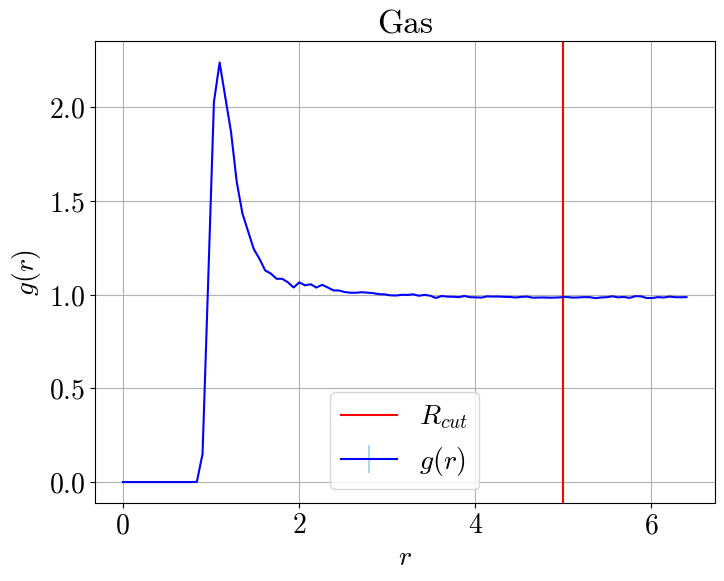

In [4]:
k=0
df_pres = pd.read_csv('OUTPUT/'+dir[k]+'/gofr.dat',sep='\t')
#x = np.arange(len(df_pres))+1
#x*=1000
plt.errorbar(df_pres.iloc[:,0],df_pres.iloc[:,1],df_pres.iloc[:,2],color='blue',ecolor='lightblue',label='$g(r)$')
plt.axvline(x=r_cut[k],color='red',label='$R_{cut}$')
plt.ylabel('$g(r)$')
plt.xlabel('$r$')
#plt.ylabel('$C$')
plt.legend()
plt.title(type[k])
plt.grid(True)
plt.show()

/Users/giovannigalafassi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


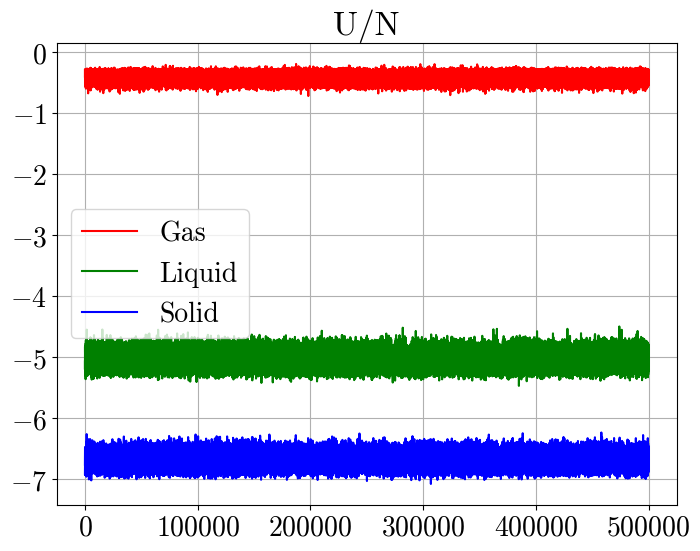

In [19]:
for k in range(0,3):
    df_temp = pd.read_csv('OUTPUT/'+dir[k]+'/Statistic/potential_energy.dat',sep='\t')
    x=df_temp.iloc[:,0]
    y=df_temp.iloc[:,1]
    plt.plot(x,y,label=type[k],color=color[k])
plt.title('U/N')
plt.legend()
plt.grid(True)
plt.show()

$\chi(t)=\frac{\langle m(t')m(t'+t)\rangle-\langle m \rangle^2}{\sigma_m^2}$

In [7]:
chi=np.zeros([201,3])
for k in range(0,3):
    df_temp = pd.read_csv('OUTPUT/'+dir[k]+'/Statistic/potential_energy.dat',sep='\t')
    x=df_temp.iloc[:,0]
    y=df_temp.iloc[:,1]
    err=df_temp.iloc[:,3]
    chi[:,k] = acf(y,nlags=200)

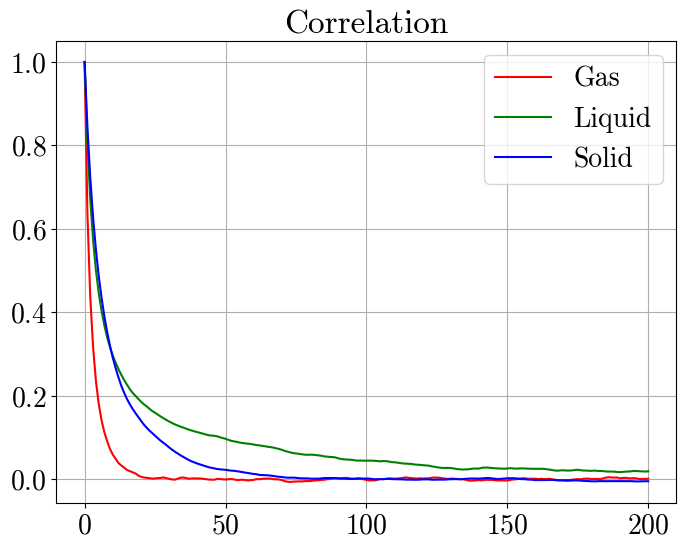

In [20]:
for k in range(0,3):
    x = np.arange(201)
    plt.plot(x,chi[:,k],label=type[k],color=color[k])

plt.title('Correlation')
plt.legend()
plt.grid()
plt.show()

In [10]:

N=[50000,25000,20000,10000,7500,5000,4000,2500,2000,1000,750,500,400,250,200,100]#[100,250,500,1000,2500,5000,10000,25000,50000]
L=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
st=np.zeros([len(N),3])

In [11]:
for k in range(0,3):
    stat = pd.read_csv('OUTPUT/'+dir[k]+'/Statistic/potential_energy.dat',sep='\t')
    x=stat.iloc[:,0]
    y=stat.iloc[:,1]
    err=stat.iloc[:,3]

    for m in range(0,len(N)):
        c=0.
        c2=0.
        t=0.
        t2=0.
        y_b=np.zeros(N[m])
        y2=np.zeros(N[m])
        e_b=np.zeros(N[m])
        blk= np.arange(N[m])+1
        L[m]=int(len(x)/N[m])
        for i in range(0,N[m]):
            for j in range(0,L[m]):
                c+=y[L[m]*i+j]
            c/=L[m]
            #c2/=L[m]
            t+=c
            t2+=c**2
            y_b[i]=t/(i+1)
            y2[i]=t2
            c=0.
            c2=0.
            e_b[i]=np.sqrt((y2[i]/(i+1) - y_b[i]**2)/(i+1))
        st[m,k]=e_b[-1]


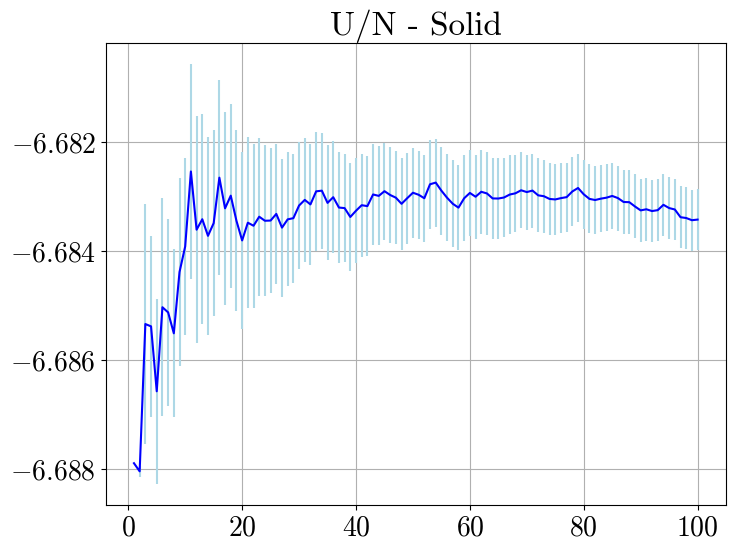

In [12]:
plt.errorbar(blk,y_b,e_b,color='blue',ecolor='lightblue')
plt.title('U/N - '+type[k])
plt.grid()
plt.show()

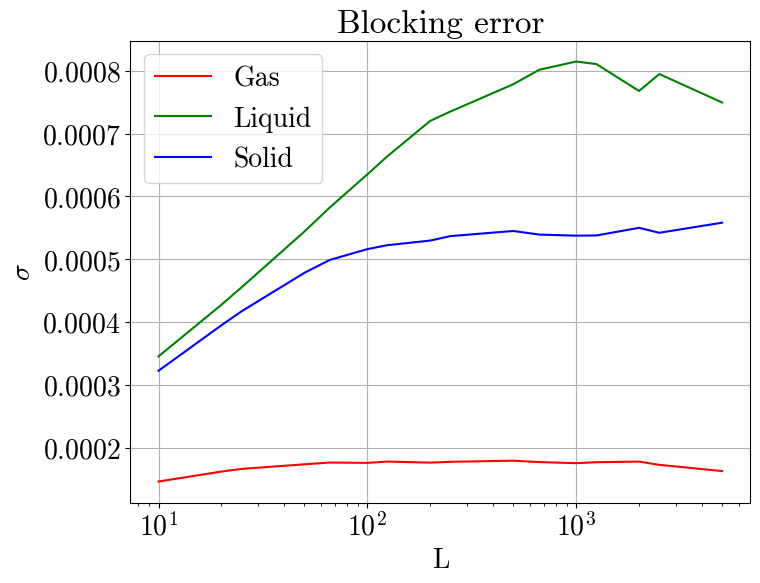

In [21]:
plt.title('Blocking error')
for k in range(0,3):
    plt.plot(L,st[:,k],label=type[k],color=color[k])
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('L')
plt.legend()
plt.ylabel('$\sigma$')
plt.grid()
plt.show()

In [127]:
chi[19]

0.0